<img height="70" src="slogan.png" width="600">

<center><h1><u>Python Unit Summary Project</u></h1>

## Introducción

Para este trabajo, analizaremos los datos del Titanic y veremos si hay una correlación entre las posibilidades de supervivencia y ciertas características de cada pasajero (género, clase de cabina, precio del boleto, etc.)

El ejercicio es calificado sobre **100 puntos**

## Instrucciones generales

 - Cada operación debe realizarse en una celda separada.
 - Puedes obtener ayuda en el material de la clase y buscar información en Internet.

## Parte 1 - Análisis de Datos Guiado

1. Importa las librerías necesarias al cuaderno. (Si más adelante necesitas usar librerías adicionales, regresa a esta celda, agrega las librerías aquí y ejecuta nuevamente la celda)

> Explicación: Por orden y organización, se recomienda que todas las librerías importadas al cuaderno estén al principio del mismo.

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import re
import numpy as np

2. Importa el dataset `titanic.csv` en el cuaderno. Investiga la base de datos en internet y/o utiliza la información que se detalla a continuación para comprender las columnas: **(4 puntos)**

    - **PassengerId (Identificación del pasajero)**: Identificador único para cada pasajero.  
    - **Survived (Sobreviviente)**: Indica si el pasajero sobrevivió o no al naufragio. 1 = Sobrevivió, 0 = No sobrevivió.
    - **Pclass (Clase)**: Clase del pasajero en el barco. 1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase.
    - **Name (Nombre)**: Nombre del pasajero.
    - **Sex (Sexo)**: Género del pasajero.
    - **Age (Edad)**: Edad del pasajero en años.
    - **SibSp (Hermanos/Cónyuges a bordo)**: Número de hermanos o cónyuges que el pasajero tenía a bordo.
    - **Parch (Padres/Hijos a bordo)**: Número de padres o hijos que el pasajero tenía a bordo.
    - **Ticket (Boleto)**: Número del boleto del pasajero.
    - **Fare (Tarifa)**: Tarifa pagada por el pasajero.
    - **Cabin (Cabina)**: Número de la cabina del pasajero.
    - **Embarked (Puerto de embarque)**: Puerto donde el pasajero embarcó. C = Cherbourg, Q = Queenstown, S = Southampton.

In [182]:
datos_titanic = pd.read_csv('titanic.csv')
datos_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Usando los métodos que hemos aprendido, inspecciona el dataframe y realiza lo siguiente: **(7 puntos)**

    - Revisa los valores nulos en las columnas
    - En el caso que haya valores nulos:        
        - ¿Tiene sentido que esas columnas tengan valores nulos? 
        - ¿Cuántos valores nulos existen? 
        - ¿Los valores nulos afectarán el análisis?

In [183]:
# Valores Nulos
valores_nulos = datos_titanic.isnull().sum().sum()
print(f'El total de los valores nulos es: {valores_nulos}')



El total de los valores nulos es: 866


## Respuestas
### ¿Tiene sentido que esas columnas tengan valores nulos?
Viéndolo desde una perspectiva analítica lo mejor es que se cuenten con los datos completos, pero si lo vemos desde una perspectiva histórica en la cual en esa época no se contaba con recursos tecnológicos para obtener datos como ahora, vemos que:
En la columna Age tendría sentido ya que en los registros históricos es común que  no se tenga la edad de las personas. O puede ser que se hayan perdido algunos datos. Y aun asi es importante identificar si existirían patrones en los valores nulos o relacionar si la falta de edad esta relacionada a otros valores como la clase social. Pero aùn asi es super importante tener esos datos ya que se priorizan a niños y mujeres en situaciones de desastre.

En la columna Cabin también tiene sentido por la volumetría de los pasajeros y teniendo en cuenta que la mayoría de esos pasajeros están en tercera clase o podrían no haber tenido una cabina asignada, ya que la clase social influyo un montón en si sobrevivían o no, porque se dio prioridad a pasajeros de primera clase a recursos para salvar sus vidas y eso tendría sentido el porque esa columna tiene la mayor cantidad de nulos con 687.

En la columna Embarked solo se cuentan con 2 valores nulos por lo que la mayoría de pasajeros cuentan con ese dato. Lo que en un análisis eso valores no afectarían significativamente. Pero esos valores se pueden deber a la clase económica por lo que el precio del pasaje seria el menor y asi el puerto de embarque no seria el mejor y no se registraron esos datos. Y aun asi se recomienda seguir teniendo esos datos por buenas prácticas.

### ¿Cuántos valores nulos existen? 
Existen 177 nulos en Age que representa un 19.9%, 687 nulos en Cabin que representan un 77.1% y 2 nulos en Embarked que representan un 0.2% con un total de 866 valores nulos. En el caso de la columna Cabin al ser un porcentaje alto, lo mejor seria tomar una decision si se elimina o se transforma esos datos a otra variable que muestre si fue asignada o no la cabina.
        
### ¿Los valores nulos afectarán el análisis?
Si, ya que si lo miramos desde analizar esto para salvar vidas vemos que las columnas Age y Cabin son las que mayor valor de nulos tiene y por ende la edad es muy critica para identificar a grupos vulnerables ya sean recién nacidos, niñ@s o adultos mayores y al no contar con esos datos no sabemos a quien tenemos que darle un poco mas de prioridad que a otro y por el otro lado, en la columna de Embarcaciones igual puede influir a la hora de un accidente, ya que eso ayudaría a saber la distribución de los botes salvavidas en todo el barco y cual es la zona en que mas botes salvavidas hay.

Por lo cual, interpretar estos datos a la hora de que haya un accidente cambiaría por completo las estrategias de rescate o intervención de fallos, ya que al no contar con datos completos  no sabemos a quien priorizar y eso puede llevar a que se pierdan vidas humanas. Y eso que no se están tomas en cuenta datos de personas que tienen enfermedades o que cuentan con alguna discapacidad.

Adicional, se recomienda hacer un segundo análisis  con los datos completos para poder tener una mejor visión de la situación y poder tomar decisiones. Y a la par hacer un análisis de los datos nulos,  para poder identificar los patrones y poder identificar a que se deben los valores nulos y como en un futuro se puede corregir eso para que no vuelvan a surgir catástrofes como estas.



4. Eliminar la columna `Cabin` del df **(4 punto)**

In [184]:
datos_titanic.drop( columns = [ 'Cabin' ], inplace =True)

In [185]:
# Verificación

datos_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


5. Actualiza los valores nulos de la columna `Age` para las mujeres, usando el valor de la mediana de edad de todas las pasajeras mujeres **(7 puntos)**

In [186]:
#Calculamos los datos
edad_mediana_mujeres = datos_titanic[datos_titanic['Sex'] == 'female']['Age'].median()
#Actualizamos los datos nulos
datos_titanic.loc[( datos_titanic[ 'Sex' ] == 'female' ) & (datos_titanic['Age'].isnull()), 'Age' ] = edad_mediana_mujeres
#Verificamos si fueron actualizados
edad_mujeres_actualizacion = datos_titanic[ ( datos_titanic['Sex'] == 'female') & ( datos_titanic['Age'].isnull())].shape[0]
print(f"Mediana de edad de las mujeres: {edad_mediana_mujeres} ")
print(f"Valores restantes en Age de mujeres: {edad_mujeres_actualizacion} ")

Mediana de edad de las mujeres: 27.0 
Valores restantes en Age de mujeres: 0 


6. Actualiza los valores nulos de la columna `Age` para los hombres, usando el valor de la mediana de edad de todos los pasajeros hombres **(7 puntos)**

In [187]:
#Calculamos los datos
edad_mediana_hombres = datos_titanic[datos_titanic['Sex'] == 'male']['Age'].median()
#Actualizamos los datos nulos
datos_titanic.loc[( datos_titanic[ 'Sex' ] == 'male' ) & (datos_titanic['Age'].isnull()), 'Age' ] = edad_mediana_hombres
#Verificamos si fueron actualizados
edad_hombres_actualizacion = datos_titanic[ ( datos_titanic['Sex'] == 'male') & ( datos_titanic['Age'].isnull())].shape[0]
print(f"Mediana de edad de los hombres: {edad_mediana_hombres} ")
print(f"Valores restantes en Age de los hombres: {edad_hombres_actualizacion} ")

Mediana de edad de los hombres: 29.0 
Valores restantes en Age de los hombres: 0 


7. Rellena el valor faltante en la columna de `Embarked` con el valor más común (el valor que más se repite en esta columna) **(7 puntos)**

In [188]:
#Encontramos el valor mas comùn
valor_comun_embarcacion = datos_titanic['Embarked'].mode()[0]
print( f"El valor mas comun es: {valor_comun_embarcacion}" )
#Rellenamos los valores faltantes
datos_titanic['Embarked'] = datos_titanic['Embarked'].fillna(valor_comun_embarcacion)
#Verificamos
valor_comun_embarcacion = datos_titanic['Embarked'].isnull().sum()
print(f"Valores faltantes despues de rellenar con el valor mas comun: {valor_comun_embarcacion}" )


El valor mas comun es: S
Valores faltantes despues de rellenar con el valor mas comun: 0


8. [Crear un gráfico para mostrar la distribución de pasajeros por género (`Sex`) en porcentaje. Escoge un gráfico claro y presentable.] **(7 puntos)**

<function matplotlib.pyplot.show(close=None, block=None)>

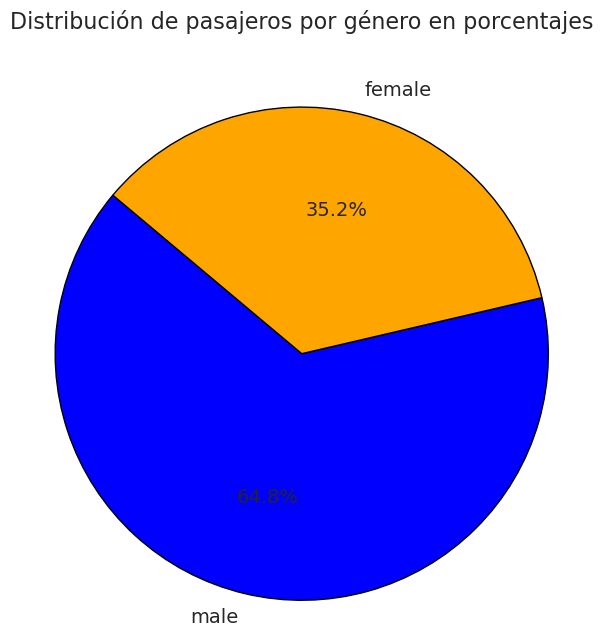

In [189]:
#Obtenemos los porcentajes
distribucion_por_genero = datos_titanic['Sex'].value_counts(normalize=True) * 100
#Creamos el gráfico
plt.figure(figsize=(7, 7))
plt.pie( distribucion_por_genero, 
        labels= distribucion_por_genero.index, 
        autopct='%1.1f%%', 
        startangle= 140, 
        colors= ['blue', 'orange'],
        wedgeprops = { 'edgecolor': 'black' },
        textprops = { 'fontsize' : 14 }
        )
plt.title('Distribución de pasajeros por género en porcentajes', fontsize=16, pad=40)
plt.axis('equal')
plt.show

9. Crear un gráfico para mostrar la distribución de pasajeros por género (`Sex`) y si sobrevivieron (`Survived`). Escoge un gráfico claro y presentable. **(7 puntos)**

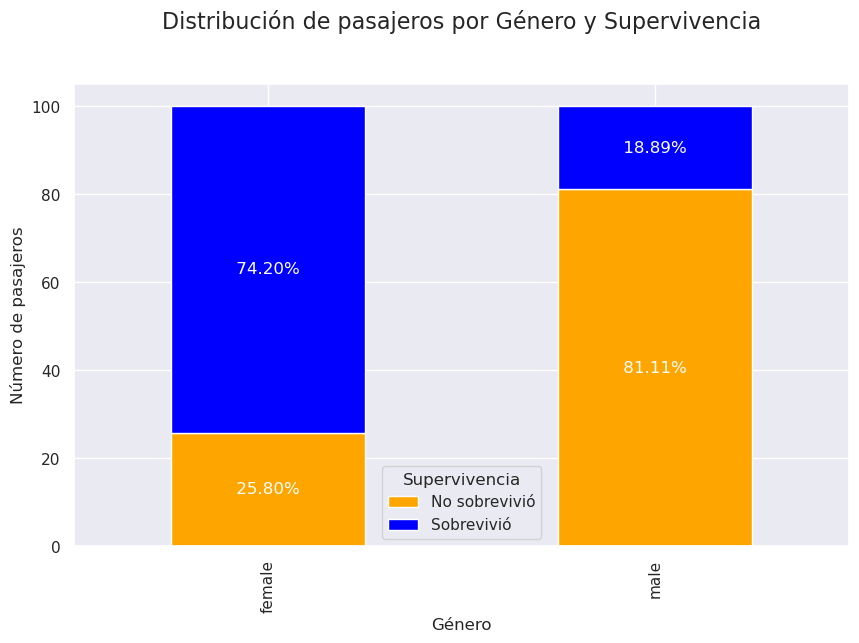

In [190]:
# Contamos los pasajeros y si sobrevivieron
supervivencia_genero = pd.crosstab( datos_titanic['Sex'], datos_titanic['Survived'] )
supervivencia_porcentajes = supervivencia_genero.div(supervivencia_genero.sum(1), axis=0) * 100
# Creamos el gráfico
grafico = supervivencia_porcentajes.plot( kind = 'bar', stacked = True, color = [ 'orange', 'blue' ], figsize = (10,6) )
plt.title('Distribución de pasajeros por Género y Supervivencia', pad=40, fontsize=16)
plt.xlabel('Género')
plt.ylabel('Número de pasajeros')
#Añadimos los porcentajes
for p in  grafico.patches:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  grafico.text( x + width / 2, y + height / 2, f'{height: .2f}% ', ha = 'center', va = 'center', color = 'white', fontsize = 12 )
handles, labels = grafico.get_legend_handles_labels()
plt.legend(handles, [ 'No sobrevivió', 'Sobrevivió' ], title='Supervivencia')
sbn.set_style('darkgrid')

plt.show()

10. Usa un gráfico displot para mostrar la distribución de los pasajeros por edades. Sigue las siguientes instrucciones: **(10 puntos)**

    - Separa en dos gráficos según los valores en la columna de género (`Sex`).
    - Dentro de cada gráfico, divide los datos en series según los datos en la columna `Survived`.
    - Configura la visualización para que los datos estén apilados.
    
Vista previa:   


<img height="40" src="preview.png" width="800">

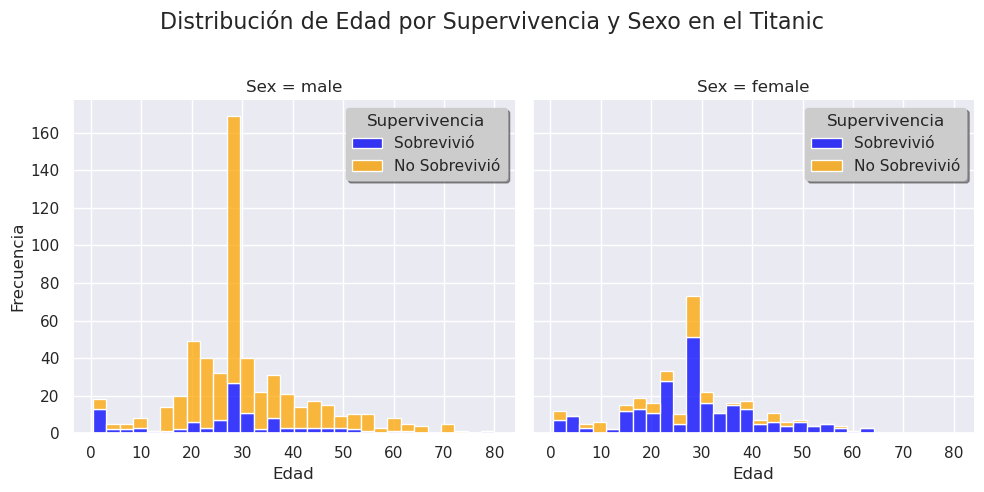

In [191]:
# Creamos el gráfico
colores = { 0: 'orange', 1: 'blue' }

g = sbn.displot(datos_titanic, 
            x='Age', 
            hue='Survived', 
            col='Sex', 
            multiple='stack', 
            legend=False,
            palette= colores
            )
# Añadimos títulos y etiquetas
g.figure.suptitle('Distribución de Edad por Supervivencia y Sexo en el Titanic', fontsize = 16)

plt.subplots_adjust(top= 0.8)

g.set_axis_labels('Edad', 'Frecuencia')

# Añadimos la leyenda
for ax in g.axes.flat:
  ax.legend(
    title = 'Supervivencia',
    loc = 'upper right',
    labels = [ 'Sobrevivió', 'No Sobrevivió' ],
    shadow = True,
    framealpha = 1,
    facecolor = '0.80'
  )

sbn.set_style('darkgrid')

plt.show()

11. Ahora, examina si existe una correlación entre las diferentes columnas. Para ello, selecciona solo las columnas que tengan significado (por ejemplo, el número de pasajeros puede variar, pero esta cifra no afecta a los resultados del análisis). **(10 puntos)**

    - Crea una tabla de correlación aplicando el método `corr()` a los datos. Guarda el resultado en una variable llamada `corr_mtx`.
    - Crea un gráfico de mapa de calor que se ejecutará en los datos de la tabla de correlación y diséñalo como desees.
    - ¿Existe una correlación positiva fuerte (valores cercanos a 1) o una correlación negativa (valores cercanos a -1) entre alguna de las columnas?

             PassengerId       Age      Fare    Pclass  Survived     SibSp  \
PassengerId     1.000000  0.035734  0.012658 -0.035144 -0.005007 -0.057527   
Age             0.035734  1.000000  0.094161 -0.338056 -0.073296 -0.236376   
Fare            0.012658  0.094161  1.000000 -0.549500  0.257307  0.159651   
Pclass         -0.035144 -0.338056 -0.549500  1.000000 -0.338481  0.083081   
Survived       -0.005007 -0.073296  0.257307 -0.338481  1.000000 -0.035322   
SibSp          -0.057527 -0.236376  0.159651  0.083081 -0.035322  1.000000   
Parch          -0.001652 -0.176038  0.216225  0.018443  0.081629  0.414838   

                Parch  
PassengerId -0.001652  
Age         -0.176038  
Fare         0.216225  
Pclass       0.018443  
Survived     0.081629  
SibSp        0.414838  
Parch        1.000000  


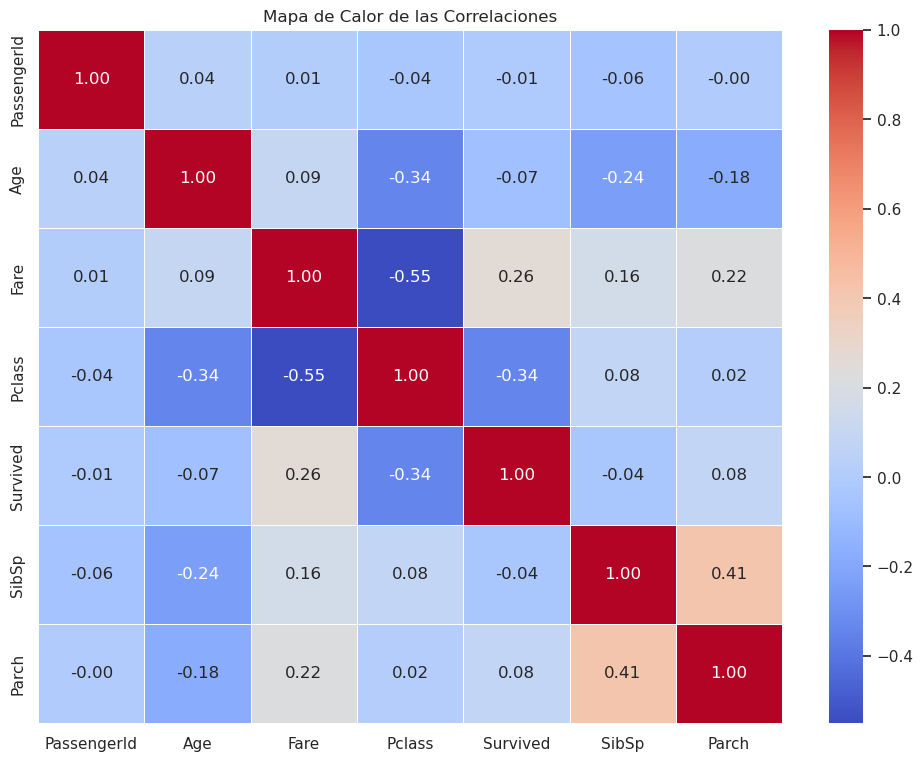

In [192]:
#Seleccionamos las columnas
datos_numericos = datos_titanic[['PassengerId', 'Age', 'Fare', 'Pclass', 'Survived', 'SibSp', 'Parch' ]]
corr_mtx = datos_numericos.corr()
print(corr_mtx)

# Creamos el gráfico de mapa de calor
plt.figure(figsize=(12, 9))
sbn.heatmap( corr_mtx, annot = True, cmap = 'coolwarm', linewidths= 0.5, fmt= '.2f')
plt.title( 'Mapa de Calor de las Correlaciones' )

plt.show()

# Explicación
Si existen dichas correlaciones, especialmente negativas. Ya que en el caso de Pclass y Fare tienen una correlación negativa moderada (-0.55). Y esto tendría sentido ya que los pasajeros en clases mas bajas pagaron tarifas mas bajas. Mientras que pasa lo contrario con pasajeros de clase mas alta pagaron pasajes de  mayor valor. Y por ende esos dos valores están relacionados a la hora de un accidente, porque vemos que Pclass tienen una correlación con Survived(-0.34) y eso quiere decir que los pasajeros de clase mas alta tienen una mayor probabilidad de sobrevivir al tener mas prioridades.

Como dijimos que entre Pclass y Survived tienen una correlación negativa y por ende tienen mas prioridad los pasajeros de clases altas, y eso puede ser a políticas del barco lo que quiere decir que en esa época no hubo justicia  social, porque si comprabas un boleto mas barato no te garantizaban que a la hora de un accidente tu vida iba a estar a salvo, era todo lo contrario. Por lo que es un hallazgo importante que indica el estatus socioeconómico jugo un papel importante  en la supervivencia de los pasajeros del Titanic.

Por otro lado la correlación entre SibSp, Parch y Survived: Vemos que hay una correlación positiva moderada entre el numero de hermanos/esposos y el numero de padres/hijos con un (0.41) eso quiere decir que familias mas grandes viajaron juntas, pero si relacionamos SibSp (-0.04) y Parch (0.08) con la supervivencia vemos que tienen una correlación pequeña, lo que indicaría que hubo otros factores màs importantes a la hora de intentar evacuar y salvar sus vidas.

Por ultimo, si relacionamos Age con Pclass, vemos otra correlación negativa (-0.34) lo que nos dice que los pasajeros mas jóvenes tenían mas probabilidades de estar en clases mas bajas. Si relacionamos Age con Survived se aprecia otra correlación negativa (-0.07) aunque es muy pequeña pero eso nos dice que la edad no fue un dato determinante por si solo a la hora de evacuación, por lo que debieron influir otros factores a la hora de salvar la vida de los pasajeros.

Como aclaratorio los datos de Sex y Embarked no se incluyeron al no ser numéricas. Pero por lo que vimos en los gráficos anteriores el sexo de la persona fue importante, siendo asi que las mujeres fueron mas propensas a sobrevivir. Dicho esto el puerto de embarque también pudo influir, dependiendo de la clase de cabina asignada a cada puerto.

## Parte 2 - Análisis continuo

12. Define 3 preguntas de investigación para analizar quién tiene una alta probabilidad de sobrevivir, y luego responde a las preguntas que has definido. **(30 puntos)**

### Pregunta N1
¿Hay diferencias en la probabilidad de supervivencia entre pasajeros que viajan solor versus  pasajeros que viajan con familia?


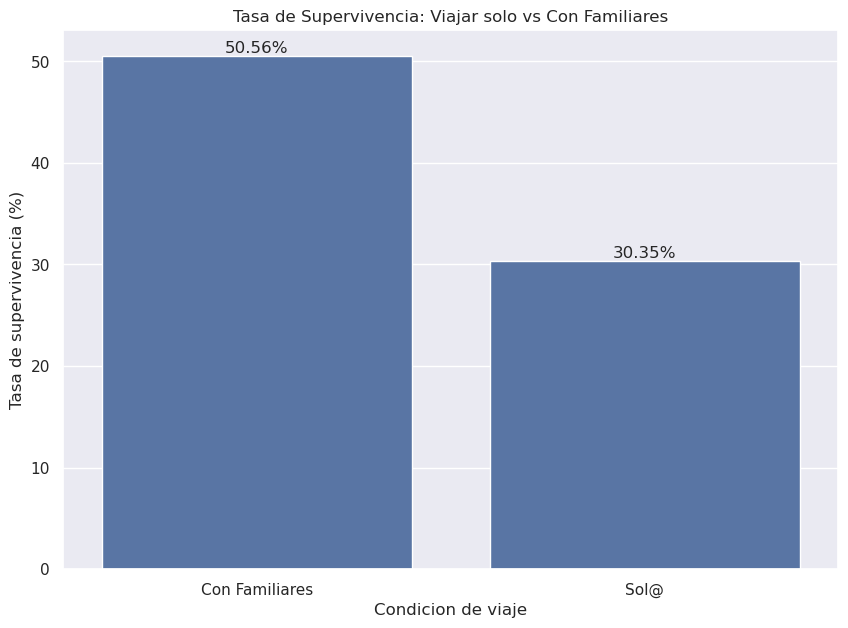

In [193]:
#Código
datos_titanic['ViajaSolo'] = np.where((datos_titanic['SibSp'] == 0) & (datos_titanic['Parch'] == 0), 'Sol@', 'Con Familiares' )

sobreviviente_viaje_solo = datos_titanic.groupby('ViajaSolo')['Survived'].mean() * 100

#Graficamos
plt.figure(figsize=(10,7))
ax = sbn.barplot( x=sobreviviente_viaje_solo.index, y=sobreviviente_viaje_solo.values)

#Añadimos las etiquetas
ax.bar_label(ax.containers[0], fmt='%.2f%%')
plt.title('Tasa de Supervivencia: Viajar solo vs Con Familiares')
plt.xlabel('Condicion de viaje')
plt.ylabel('Tasa de supervivencia (%)') 
plt.show()

#### Explicación

La tasa de supervivencia de las personas que viajaron con familiares fue de un 50.56% a diferencia de las personas que viajaron sol@s que solamente tuvieron un 30.35% de sobrevivir. Lo que evidencia el apoyo y amor familiar fue lo que ayudo a los grupos familiares a cuidarse entre si mismos, a tomar mejores decisiones  y a estar más preparados para enfrentar catástrofes. Vemos que las personas que viajaron sol@s no pudieron tomar buenas decisiones o pudo influir factores como políticas del barco en la cual decidieron dar mas prioridad a grupos familiares lo que influye en que un 70% de personas  que viajaron sol@s no tuvieron la oportunidad de subir a un bote, pero aun asi sigue siendo grave porque el otro 50% de grupos familiares perdio su vida. Eso evidencia que el titanic  fue un desastre en su organización.

---------------------------------------

### Pregunta N2
¿Hubo diferencias en la probabilidad de supervivencia en los pasajeros que tenían boletos con diferentes prefijos (ejemplo: AZ, JYP3, etc)?


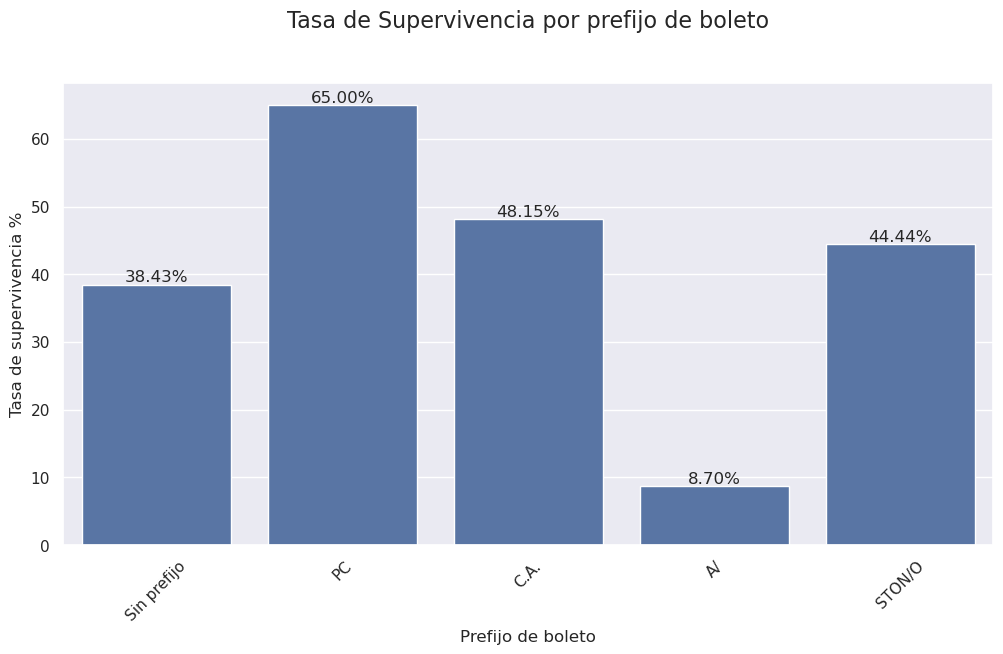

In [194]:
# Código
#Función para extraer el prefijo del ticket
def extraccion_prefix(ticket):
  match = re.match(r"^[^\d\s]+", ticket)
  if match:
    return match.group(0)
  else:
    return 'Sin prefijo'


datos_titanic['TicketPrefix'] = datos_titanic['Ticket'].apply(extraccion_prefix)
#Calculamos la tasa de supervivencia por prefijo
sobreviviente_por_ticket = datos_titanic.groupby('TicketPrefix')['Survived'].mean().sort_values(ascending=False) * 100

#Filtramos los prefijos
prefijo_suficientes_muestras = datos_titanic['TicketPrefix'].value_counts()
prefijos_validos = prefijo_suficientes_muestras[prefijo_suficientes_muestras > 10].index
sobreviviente_por_ticket = sobreviviente_por_ticket.loc[prefijos_validos]

#Creamos el grafico
plt.figure(figsize=(12, 6))
ad = sbn.barplot(x=sobreviviente_por_ticket.index, y=sobreviviente_por_ticket.values)
#Añadimos las etiquetas y los porcentajes
for container in ad.containers:
  ad.bar_label(container, fmt='%.2f%%')
  
plt.title('Tasa de Supervivencia por prefijo de boleto', fontsize=16, pad=40)
plt.xlabel('Prefijo de boleto')
plt.ylabel('Tasa de supervivencia %')
plt.xticks(rotation=45)
plt.show()



#### Explicacion

-----------------------------------

### Pregunta N3
¿El puerto de embarque afecto en la probabilidad de supervivencia?


In [195]:
#Aclaración
""" Se convirtió la columna Embarked a datos numéricos para poder tomarlo en cuenta en esta pregunta """
datos_titanic['Embarked'] = datos_titanic['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

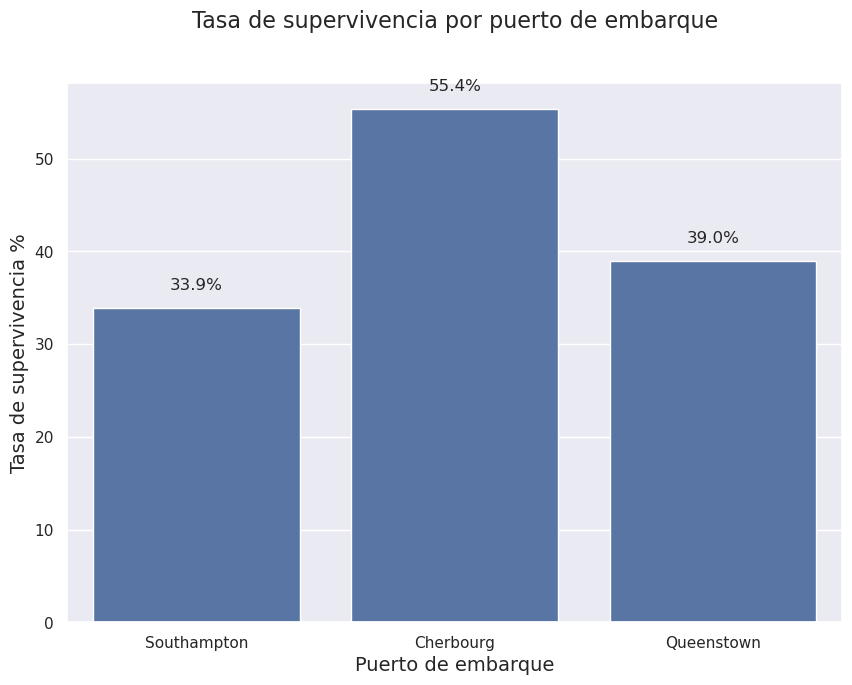

In [196]:
# Código

#Se asigna el nombre del embarque a cada numero asignado
datos_titanic['Full_embarked'] = datos_titanic['Embarked'].map({1:'Cherbourg', 2:'Queenstown', 3:'Southampton'})

#Se empieza a graficar
plt.figure(figsize=(10,7))
sbn.barplot( x='Full_embarked', y='Survived', data=datos_titanic, errorbar=None)

#Se añaden las etiquetas
plt.title('Tasa de supervivencia por puerto de embarque', fontsize=16, pad=40)
plt.xlabel('Puerto de embarque', fontsize=14)
plt.ylabel('Tasa de supervivencia %', fontsize=14)
#Se añaden los porcentajes
for x, label in enumerate(datos_titanic['Full_embarked'].unique()):
  survival_rate = datos_titanic[datos_titanic['Full_embarked'] == label]['Survived'].mean()
  plt.text(x, survival_rate + 0.02, f'{survival_rate * 100:.1f}%', ha='center', fontsize=12)
#Se transforma los valores del eje y a enteros
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y * 100)}'))
  
plt.show()




#### Explicación